### Importing Libraries

In [59]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Read Data 


In [60]:
data = pd.read_csv("train.csv")
print(data.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 0:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 1:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 2:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 3:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 4:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0      81.0        0.0       3          13     16  
1      80.0        0.0       8          32     40  
2      80.0        0.0       5          27     32  
3      75.0        0.0       3          10     13  
4      75.0        0.0       0           1      1  


In [61]:
print(data.shape)

(12980, 12)


### Checking Columns

In [62]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Describing Data

In [63]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


### Checking for the null values

In [64]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


### We know that Casual + Registered = Count , Count is our target variable so we will not consider Casual and Register

In [66]:
data.drop(columns = ["casual","registered"],inplace = True)

In [67]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,1


### Drop the datetime columns

In [68]:
data.drop(columns = ["datetime"],inplace = True)

In [69]:
print(data.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395      81.0        0.0   
1       1        0           0        1  9.02  13.635      80.0        0.0   
2       1        0           0        1  9.02  13.635      80.0        0.0   
3       1        0           0        1  9.84  14.395      75.0        0.0   
4       1        0           0        1  9.84  14.395      75.0        0.0   

   count  
0     16  
1     40  
2     32  
3     13  
4      1  


### Performing EDA via Pairplots to understand numeric data

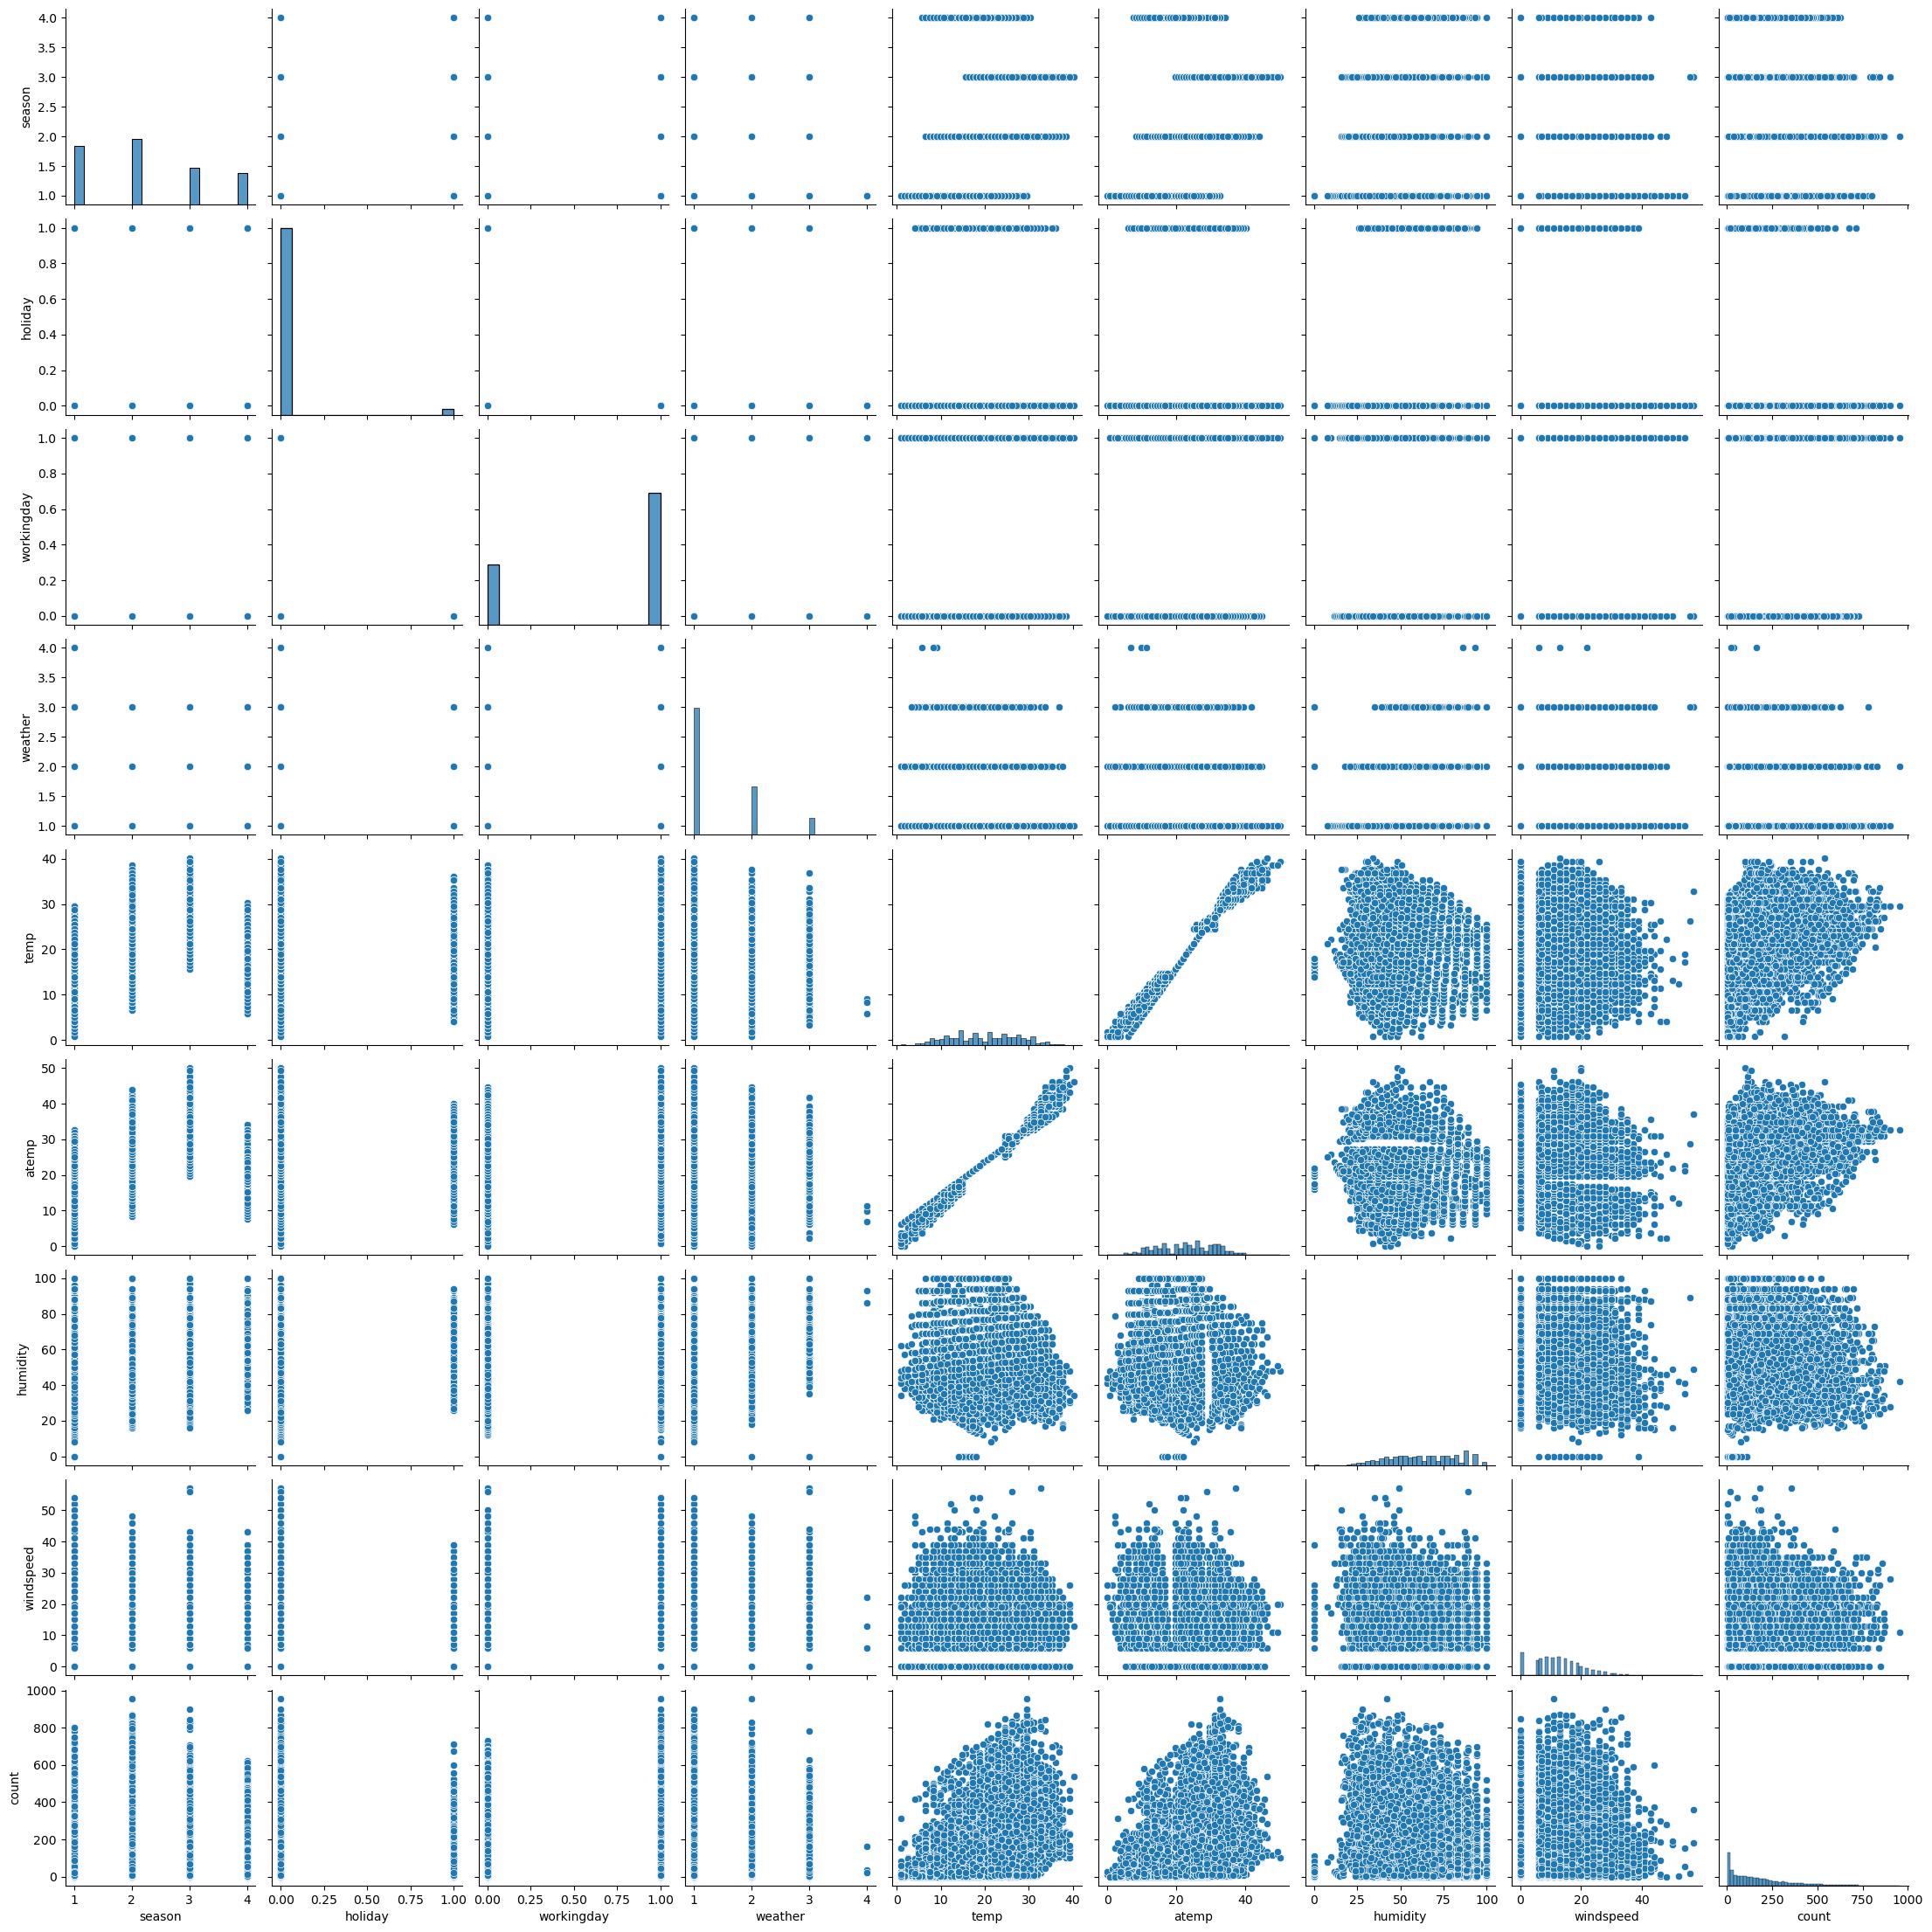

In [70]:
sns.pairplot(data, vars = ["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","count"])
plt.show()

### From the above graph we can see that temp and atemp have a relationship. Lets check the correlation.

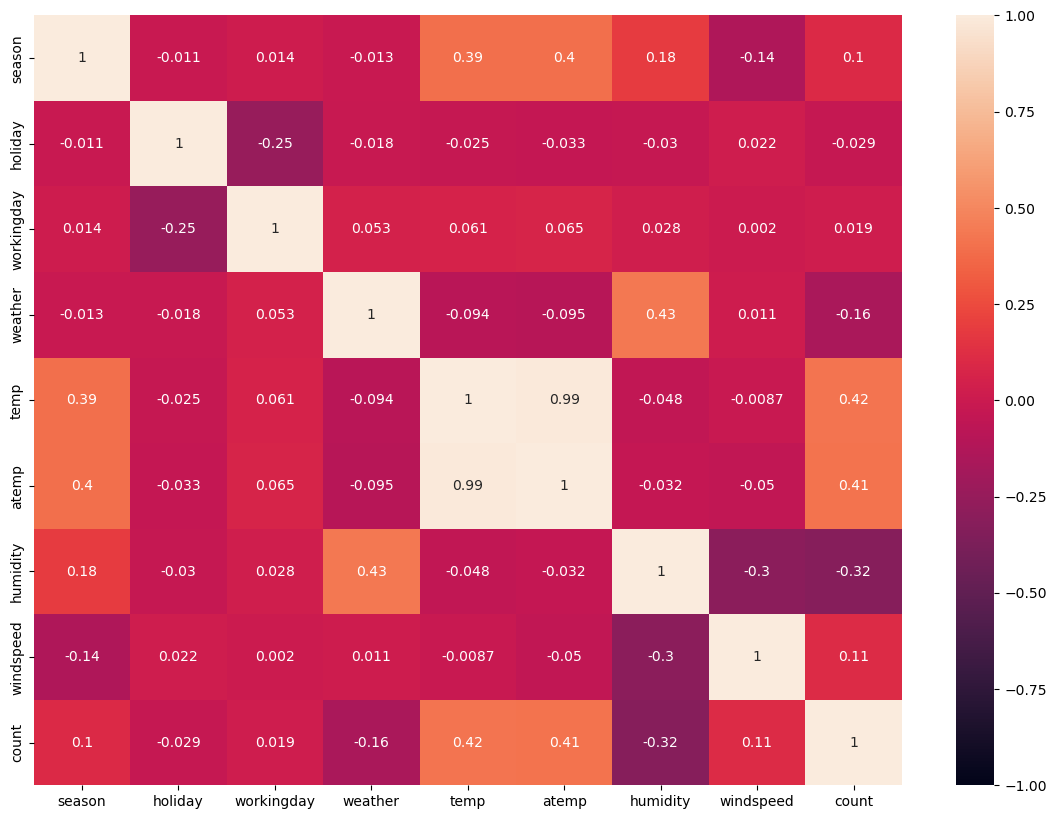

In [71]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(),annot = True,vmin = -1)
plt.show()

### Correlation between atemp and temp is 0.99 which is almost 1. We drop temp and consider atemp

In [72]:
data.drop(columns = ["temp"], inplace = True)

In [73]:
print(data.head())

   season  holiday  workingday  weather   atemp  humidity  windspeed  count
0       1        0           0        1  14.395      81.0        0.0     16
1       1        0           0        1  13.635      80.0        0.0     40
2       1        0           0        1  13.635      80.0        0.0     32
3       1        0           0        1  14.395      75.0        0.0     13
4       1        0           0        1  14.395      75.0        0.0      1


In [74]:
print(data.shape)

(12980, 8)


### Now our data is ready to split

In [75]:
#### spliting the data into x and y 
x = data[["season","holiday","workingday","weather","atemp","humidity","windspeed"]]
y = data["count"]

In [76]:
print(x.shape)
print(y.shape)

(12980, 7)
(12980,)


In [77]:
##### spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 422)

In [78]:
print(x_train.shape)

(10384, 7)


In [79]:
print(x_test.shape)

(2596, 7)


In [80]:
model = LinearRegression()
print("Model is Loaded")

Model is Loaded


In [81]:
model_fitting = model.fit(x_train,y_train)
print("Model is trainned or fitted")

Model is trainned or fitted


In [82]:
#### Checking the accuracy of traing data
acc_train = round(model_fitting.score(x_train,y_train),2)
print(acc_train)

0.27


In [83]:
pred = model_fitting.predict(x_test)
print(pred)

[161.2930248  145.80371725 264.83943067 ...  37.76896182  58.70375479
 177.98349232]


In [84]:
#### Checking the accuracy of the testing data
acc_test = r2_score(y_test,pred)
print(acc_test)

0.25646611909970696


In [85]:
#### save the model
import joblib

In [86]:
joblib.dump(model,"Regression_model_Rental_bike.save")

['Regression_model_Rental_bike.save']